In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
from sFLD import *
from calculate_error import *

# Get the Files Containing the Simulated Spectral Data

In [64]:
e_pathname = "/Users/jameswallace/Desktop/Project/data/verification_run_2021-06-14-1239/Esun.csv"
l_pathname = "/Users/jameswallace/Desktop/Project/data/verification_run_2021-06-14-1239/Lo_spectrum_inclF.csv"
f_pathname = "/Users/jameswallace/Desktop/Project/data/verification_run_2021-06-14-1239/fluorescence_scalars.csv"

In [73]:
# place the spectra in readable dataframes
e_df = get_simulated_spectral_df(e_pathname)
l_df = get_simulated_spectral_df(l_pathname)
f_df = pd.read_csv(f_pathname)
f_df = f_df.iloc[1:]

In [74]:
# get the O2A fluorescence from the fluorescence scalars df
f_761 = pd.to_numeric(f_df['F761'])

In [75]:
# now average them for every ten rows
e_average = average_dataframe(e_df, 10)
l_average = average_dataframe(l_df, 10)
f_average = average_dataframe(f_761, 10)

# Resample the E and L spectra to match retrieval instrument FWHM

In [76]:
# for each row in the dataframe resample the spectra

# initiate new dfs

e_resampled = []

for row in e_average.index:
    temp = np.asarray(e_average.iloc[row])
    temp_resampled = resample_spectra(3.5, temp)[0]
    e_resampled.append(temp_resampled)
    
l_resampled = []

for row in l_average.index:
    temp = np.asarray(l_average.iloc[row])
    temp_resampled, re_wave = resample_spectra(3.5, temp)
    l_resampled.append(temp_resampled)

# generate two arrays containing the arrays of the resampled data

# Apply the sFLD method to each resampled averaged row in the E and L dfs

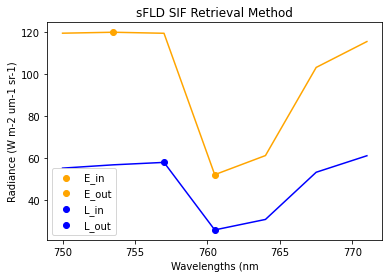

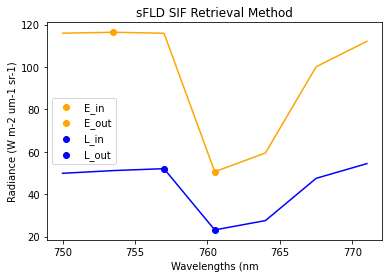

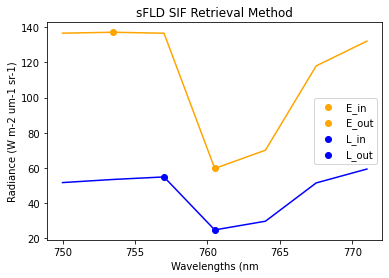

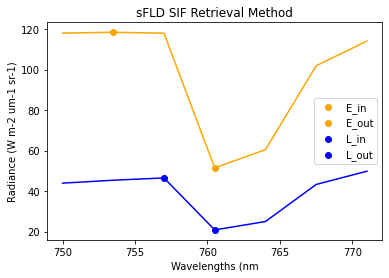

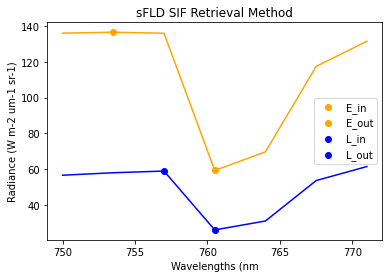

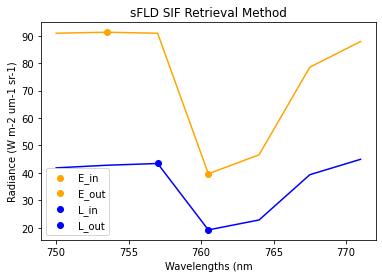

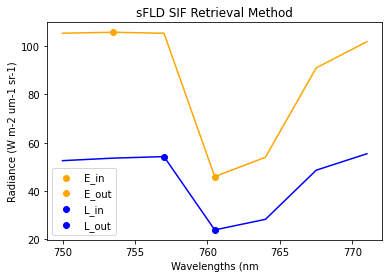

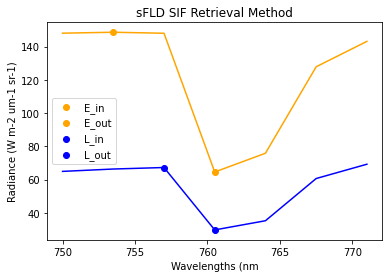

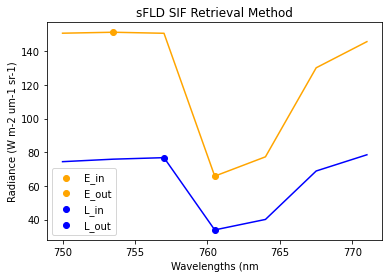

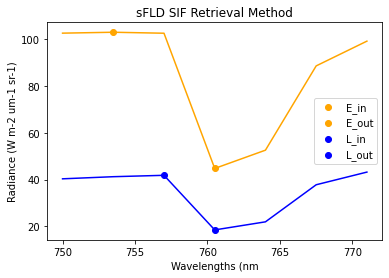

In [80]:
differences = []
for i in range(len(e_resampled)):
    error = f_average[i] - sFLD(e_resampled[i], l_resampled[i], re_wave, plot = True)
    differences.append(error)

In [83]:
np.sqrt(np.asarray(differences)**2)

array([0.31867061, 0.28690394, 0.65632507, 0.51481411, 0.2492361 ,
       0.1123995 , 0.13043028, 0.07682031, 0.0361302 , 0.06982809])